In [176]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv("../DataFiles/housing.data",delim_whitespace=True, header=None, names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
USAhousing = pd.read_csv("../DataFiles/USA_Housing.csv")
samples, columns = USAhousing.shape
features = columns -1
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
print(samples, columns)
USAhousing.head(7)


5000 7


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."


In [187]:
def create_model(x1,x2, y,bins = 10):
    minx1,max1 = np.min(x1), np.max(x1)
    minx2,max2 = np.min(x2), np.max(x2)
    miny,maxy = np.min(y), np.max(y)
    stepx1, stepx2, stepy = np.ptp(x1)/bins, np.ptp(x2)/bins, np.ptp(y)/bins
    
    rangex1, rangex2, rangey = np.arange(minx1+stepx1, max1+stepx2, stepx1), np.arange(minx2+stepx2, max2+stepx2, stepx2), np.arange(miny+stepy,maxy+stepy,stepy)
    #print ("rango y",rangey)
    #print ("rango x2",rangex2)
    out = np.zeros((bins,bins,bins))
    
    
    for i,value in enumerate(zip(x1,x2)):
        
        binx = get_bin(rangex1,value[0])
        binx2 = get_bin(rangex2,value[1])
        outy = y[i]
        biny = get_bin(rangey,outy)
        
        out[binx,binx2,biny]+=1
    print (out)
    return out

 

In [188]:
def get_bin(rangex,value):
    for i, pos in enumerate(rangex):
        if value <= pos:
            return i
    

In [189]:
x1 = X['Avg. Area House Age']
x1 = np.array(x1)

x2 = X['Area Population']
x2 = np.array(x2)
print(x1.shape, x2.shape, y.shape)
#y = y.iloc[:]


f = create_model(x1,x2,y)
print (f.shape)

(5000,) (5000,) (5000,)
172.61068627290044 69621.7133777904
[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   2.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   1.   0.   2.   1.   0.   0.   0.   0.]
  [  0.   0.   2.   1.   1.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   1.   1.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]

 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  1.   1.   2.   1.   1.   0.   0.   0.   0.   0.]
  [  1.   0.   6.   7.   2.   0.   0.   0.   0.   0.]
  [  0.   2.   9.   7.   4.   2.   0.   0.   0.   0.]
  [  0.   0.   5.   8.  10.   1.   0.   0.   0.   0.]
  [  0.   1.   2.   5.   5.   3.   0.   0.   0.   0.]
  [  0.   0.   4.   

In [171]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
def plot_hpi(x="Avg. Area House Age", x2="Area Population", num_points = 100):
    zdata = y[0:num_points]
    xdata = X[x].iloc[0:num_points,]
    ydata = X[x2].iloc[0:num_points,]
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, cmap='Greens');
    ax.set_xlabel(x)
    ax.set_ylabel(x2,labelpad=0.9)
    ax.set_zlabel("HPI")
    return ax


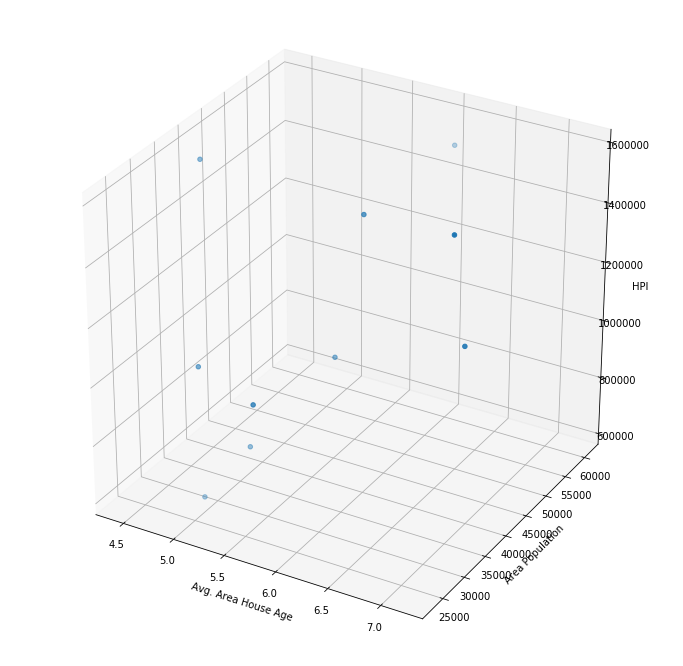

In [11]:
plot_hpi(num_points=10)

In [34]:
def train_model(model):
    
    
    model.fit(X,y)
    predictions = model.predict(X)
    print (predictions.shape)
   
    plot_hpi_regression()
    #plt.scatter(y_test,predictions)
    #plt.show()

In [35]:
def plot_hpi_regression():
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import numpy as np


    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


(5000,)


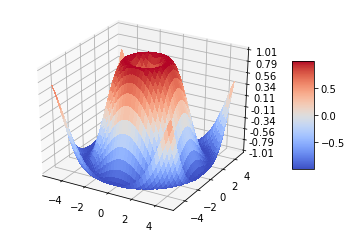

In [36]:
lm = LinearRegression()
train_model(lm)